In [1]:
from xgboost import plot_importance
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import f1_score, roc_curve, auc
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_curve, auc,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

import scipy.stats
from scipy import stats
%matplotlib inline
matplotlib.rc('font',family = 'Malgun Gothic')

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import statsmodels.api as sm

In [4]:
df_raw = pd.read_csv("DataSet_final.csv")

In [5]:
# 더미 변수화
df_raw[['Ox_Chamber']]=df_raw[['Ox_Chamber']].astype(str)
df_raw[['photo_soft_Chamber']]=df_raw[['photo_soft_Chamber']].astype(str)
df_raw[['lithography_Chamber']]=df_raw[['lithography_Chamber']].astype(str)
df_raw[['Etching_Chamber']]=df_raw[['Etching_Chamber']].astype(str)
df_raw[['Chamber_Num']]=df_raw[['Chamber_Num']].astype(str)
df_raw[['Wavelength']]=df_raw[['Wavelength']].astype(str)

# wet, dry 구분
df_raw.loc[df_raw['type']=='dry','type']=0
df_raw.loc[df_raw['type']=='wet','type']=1

# Vapor / H2O, O2 구분
df_raw.loc[df_raw['Vapor']=='H2O','Vapor']=0
df_raw.loc[df_raw['Vapor']=='O2','Vapor']=1

# Vapor / H2O, O2 구분
df_raw.loc[df_raw['Vapor']=='H2O','Vapor']=0
df_raw.loc[df_raw['Vapor']=='O2','Vapor']=1

# Wavelength 365, 405, 436
df_raw.loc[df_raw['Wavelength']=='365','Wavelength']=0
df_raw.loc[df_raw['Wavelength']=='405','Wavelength']=1
df_raw.loc[df_raw['Wavelength']=='436','Wavelength']=2

In [6]:
df_raw

,Unnamed: 0,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,...,Furance_Temp,RTA_Temp,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map,Path,Quality
0,0,1,Oxidation,0,956.156908,0,33.41,0.218,144,713.383,...,903.0,156,1,27,2019-02-17,146,none,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,1111,0
1,1,1,Oxidation,0,872.064192,1,22.14,0.217,224,714.028,...,920.0,155,22,7,2019-02-18,45,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,1111,0
2,2,1,Oxidation,0,1090.050665,1,41.20,0.206,82,703.101,...,865.0,150,3,21,2019-02-19,113,none,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,1111,0
3,3,1,Oxidation,0,872.534533,1,22.23,0.211,218,707.850,...,910.0,157,24,5,2019-02-20,81,none,[[0 0 0 0 0 0 0 0 0 0 2 2 1 2 1 2 0 0 0 0 0 0 ...,1111,0
4,4,1,Oxidation,0,1061.165672,0,31.85,0.204,162,696.610,...,894.0,155,5,16,2019-02-21,94,none,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,1111,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,825,3,Oxidation,1,1275.182502,0,45.10,0.214,21,715.498,...,868.0,152,32,11,2019-02-28,78,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...,3333,0
826,826,3,Oxidation,0,1045.950206,1,44.94,0.218,89,715.913,...,890.0,157,13,27,2019-03-01,74,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 0 0 0 0 0 0 ...,3333,0
827,827,3,Oxidation,1,1107.041866,1,32.59,0.212,118,719.257,...,903.0,157,15,21,2019-03-03,93,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 2 0 0 0 0 0 0 ...,3333,0
828,828,3,Oxidation,1,1259.826425,1,37.72,0.206,145,720.692,...,885.0,154,17,16,2019-03-05,89,none,[[0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 0 0 0 0 0 0 ...,3333,0


In [7]:
df_raw.columns

Index(['Unnamed: 0', 'Ox_Chamber', 'process', 'type', 'Temp_OXid', 'Vapor',
       'ppm', 'Pressure', 'Oxid_time', 'thickness', 'No_Die',
       'photo_soft_Chamber', 'process 2', 'resist_target', 'N2_HMDS',
       'pressure_HMDS', 'temp_HMDS', 'temp_HMDS_bake', 'time_HMDS_bake',
       'spin1', 'spin2', 'spin3', 'photoresist_bake', 'temp_softbake',
       'time_softbake', 'lithography_Chamber', 'Line_CD', 'Lamp', 'UV_type',
       'Wavelength', 'Resolution', 'Energy_Exposure', 'Etching_Chamber',
       'Process 3', 'Thin F4', 'Thin F3', 'Thin F2', 'Thin F1', 'Temp_Etching',
       'Material', 'Source_Power', 'Selectivity', 'Chamber_Num', 'process4',
       'Flux60s', 'Flux90s', 'Flux160s', 'Flux480s', 'Flux840s',
       'input_Energy', 'Current', 'Temp_implantation', 'Furance_Temp',
       'RTA_Temp', 'Lot_Num', 'Wafer_Num', 'Datetime', 'Target',
       'Error_message', 'Wafer_map', 'Path', 'Quality'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f270c206d30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f270c221430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f270c2069d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f270c221af0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f270c221e50>,
 'means': []}

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


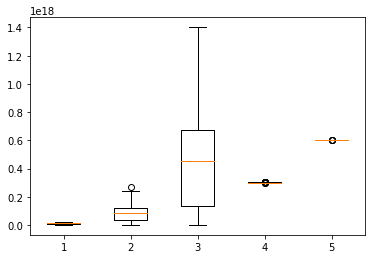

In [8]:
plt.boxplot(df_raw[['Flux60s','Flux90s', 'Flux160s','Flux480s','Flux840s']])

In [37]:
df_list_before=[ 'Oxid_time', 'N2_HMDS', 'pressure_HMDS', 'temp_HMDS','temp_HMDS_bake', 'time_HMDS_bake', 'spin1', 'spin2', 'spin3','photoresist_bake', 'temp_softbake', 'time_softbake',
        'Wavelength', 'Energy_Exposure',"Thin_F4","Thin_F2","Thin_F3","Flux90s","ppm"
,         'Temp_Etching','Source_Power', 'input_Energy']

In [38]:
# ppm별로 나눌 필요=> dry(O2), wet(H2O) 별로 모델 나눔
df_dummy=pd.get_dummies(df_raw[df_list_before])

In [39]:
# 데이터 나누기
df_x = df_raw[df_list_before]
df_y = df_raw['Quality']
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_x,df_y,test_size = 0.3,random_state = 1234)


In [40]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 21)]

for max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = max_depth, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.910,0.900
1,2,0.928,0.916
2,3,0.938,0.888
3,4,0.945,0.884
4,5,0.954,0.867
5,6,0.962,0.888
6,7,0.974,0.876
7,8,0.983,0.884
8,9,0.988,0.876
9,10,0.997,0.867


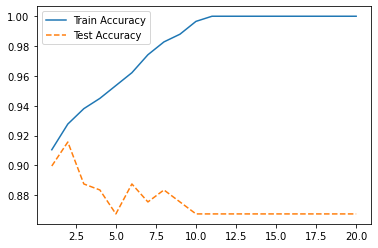

In [41]:
# 정확도를 그래프로 표현
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [42]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 10 for n_leaf in range(1, 11)]

for min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, max_depth = 6,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)


,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.933,0.892
1,20,0.910,0.900
2,30,0.910,0.900
3,40,0.910,0.900
4,50,0.910,0.900
5,60,0.910,0.900
6,70,0.910,0.900
7,80,0.910,0.900
8,90,0.910,0.900
9,100,0.910,0.900


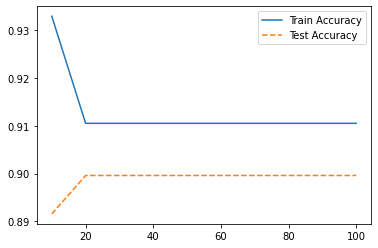

In [43]:
# 정확도를 그래프로 표현
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [44]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 20 for n_split in range(1, 11)]

for min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split=min_samples_split, min_samples_leaf = 20, max_depth = 6, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.91,0.9
1,40,0.91,0.9
2,60,0.91,0.9
3,80,0.91,0.9
4,100,0.91,0.9
5,120,0.91,0.9
6,140,0.91,0.9
7,160,0.91,0.9
8,180,0.91,0.9
9,200,0.91,0.9


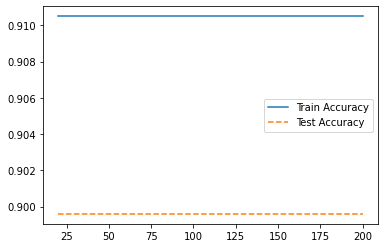

In [45]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [46]:
tree_final = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 20,random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=20, random_state=1234)

In [47]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.900

Confusion matrix: 
[[224   0]
 [ 25   0]]


In [48]:
y_pred1 = tree_final.predict_proba(df_test_x)

In [49]:
y_pred1

array([[0.98924731, 0.01075269],
       [0.98924731, 0.01075269],
       [0.83333333, 0.16666667],
       [0.83333333, 0.16666667],
       [0.98924731, 0.01075269],
       [0.98924731, 0.01075269],
       [0.98924731, 0.01075269],
       [0.8       , 0.2       ],
       [0.98924731, 0.01075269],
       [0.58823529, 0.41176471],
       [0.98924731, 0.01075269],
       [0.98924731, 0.01075269],
       [0.98924731, 0.01075269],
       [0.95294118, 0.04705882],
       [0.8       , 0.2       ],
       [0.95294118, 0.04705882],
       [0.92982456, 0.07017544],
       [0.98924731, 0.01075269],
       [0.98924731, 0.01075269],
       [0.83333333, 0.16666667],
       [0.98924731, 0.01075269],
       [0.92982456, 0.07017544],
       [0.83333333, 0.16666667],
       [0.98924731, 0.01075269],
       [0.98924731, 0.01075269],
       [0.95294118, 0.04705882],
       [0.95294118, 0.04705882],
       [0.98924731, 0.01075269],
       [0.58823529, 0.41176471],
       [0.83333333, 0.16666667],
       [0.

In [50]:
print(y_pred1)
y_pred_1 = (y_pred1[:,1] > 0.3)
#print("Confusion matrix: \n{}".format(confusion_matrix(df_train_y_wet, y_pred1)))
print()
print(y_pred_1)

[[0.98924731 0.01075269]
 [0.98924731 0.01075269]
 [0.83333333 0.16666667]
 [0.83333333 0.16666667]
 [0.98924731 0.01075269]
 [0.98924731 0.01075269]
 [0.98924731 0.01075269]
 [0.8        0.2       ]
 [0.98924731 0.01075269]
 [0.58823529 0.41176471]
 [0.98924731 0.01075269]
 [0.98924731 0.01075269]
 [0.98924731 0.01075269]
 [0.95294118 0.04705882]
 [0.8        0.2       ]
 [0.95294118 0.04705882]
 [0.92982456 0.07017544]
 [0.98924731 0.01075269]
 [0.98924731 0.01075269]
 [0.83333333 0.16666667]
 [0.98924731 0.01075269]
 [0.92982456 0.07017544]
 [0.83333333 0.16666667]
 [0.98924731 0.01075269]
 [0.98924731 0.01075269]
 [0.95294118 0.04705882]
 [0.95294118 0.04705882]
 [0.98924731 0.01075269]
 [0.58823529 0.41176471]
 [0.83333333 0.16666667]
 [0.92982456 0.07017544]
 [0.95294118 0.04705882]
 [0.8        0.2       ]
 [0.95294118 0.04705882]
 [0.95294118 0.04705882]
 [0.98924731 0.01075269]
 [0.95294118 0.04705882]
 [0.98924731 0.01075269]
 [0.98924731 0.01075269]
 [0.55       0.45      ]


In [51]:
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred_1)))

Confusion matrix: 
[[210  14]
 [ 17   8]]
